# Suport Vector Machine PCA

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import time
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA


In [2]:
import src.data_set_image_manip
from src.data import Data 
from src.plothelp import *

In [3]:
data = Data("img")
data.load_pickle("100x100.pickle")
X_train, X_test, y_train, y_test = data.train_test_split()

In [4]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

In [10]:
start = time.time()
forest = ExtraTreesClassifier(n_estimators=1000,max_features=400, n_jobs=-1,random_state=0)

forest.fit(X_train, y_train)

end = time.time()
elapsed = end - start
print("Classifier trained in ", elapsed, "seconds")


Classifier trained in  500.6009497642517 seconds


Confusion matrix, without normalization
[[74 14 17  8]
 [32 81 15 10]
 [25 17 89 21]
 [ 8 15 10 86]]


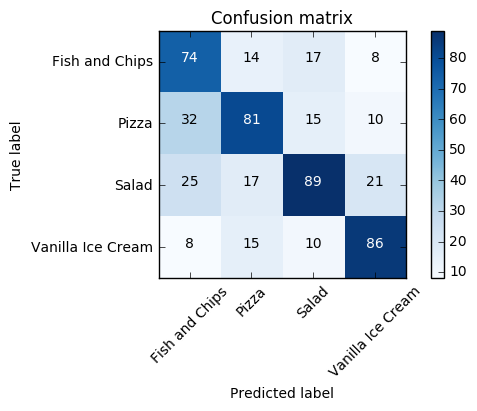

In [19]:
yf =forest.predict(X_test)
m = confusion_matrix(yf,y_test)
plot_confusion_matrix(m,forest.classes_)

In [12]:
print(classification_report(y, y_test))
print(accuracy_score(y, y_test))

                   precision    recall  f1-score   support

   Fish and Chips       0.53      0.65      0.59       113
            Pizza       0.64      0.59      0.61       138
            Salad       0.68      0.59      0.63       152
Vanilla Ice Cream       0.69      0.72      0.70       119

      avg / total       0.64      0.63      0.63       522

0.632183908046


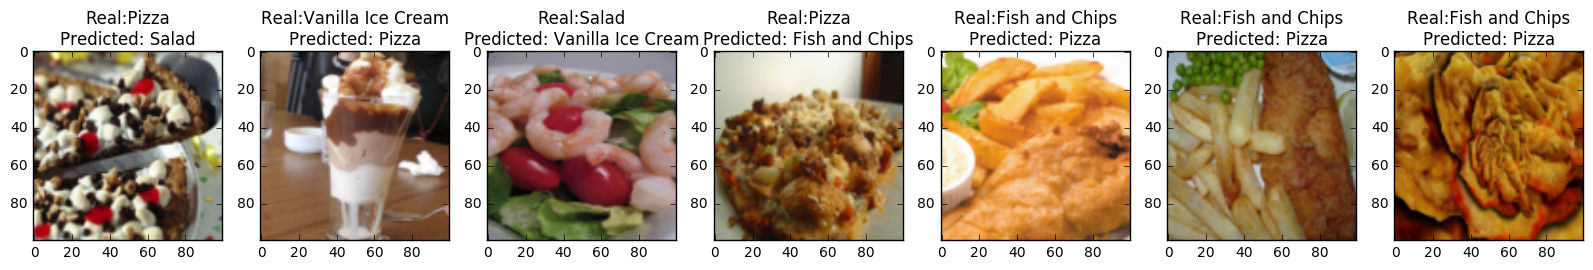

In [16]:
plot_misclassified(X_test, y_test, y, 7)

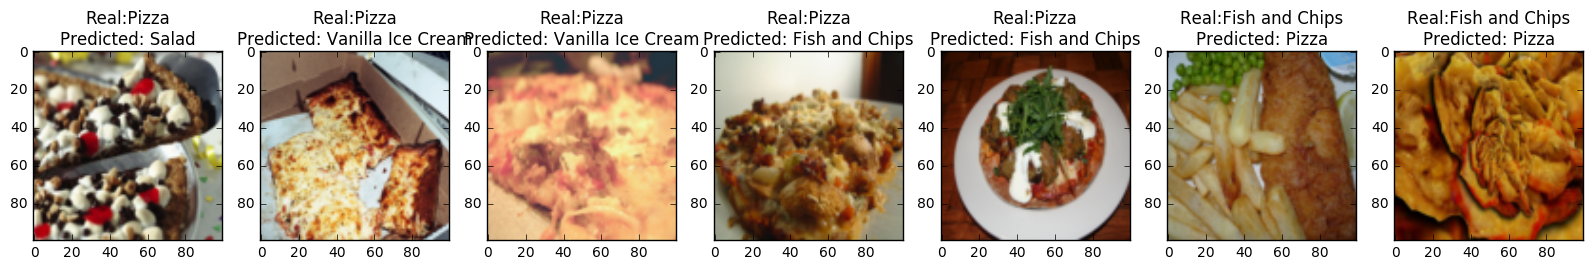

In [18]:
plot_misclassified(X_test, y_test, yf, 7)